### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is.

 One-to-One approach, which breaks down the multiclass problem into multiple binary classification problems. A binary classifier per each pair of classes.
  In One-to-Rest approach, the breakdown is set to a binary classifier per each class.

In [85]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


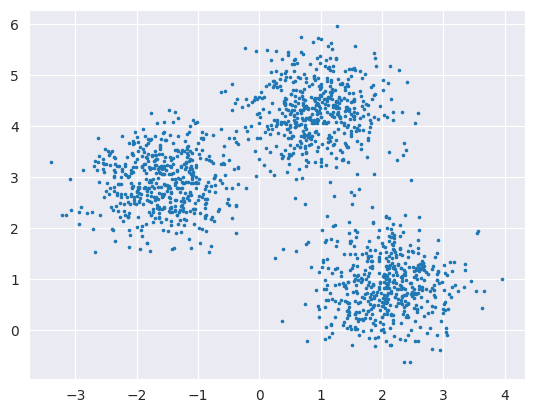

In [86]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker=".", s=10)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

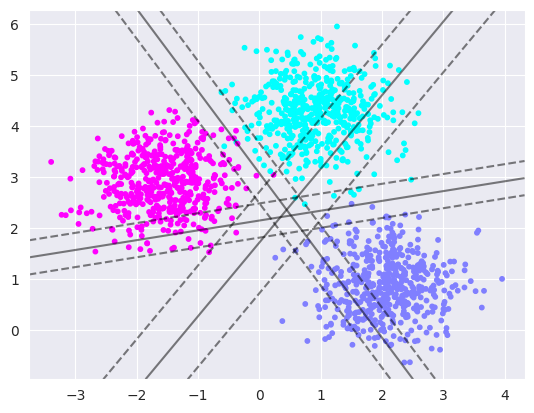

In [87]:
from sklearn import svm
import numpy as np


def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 500)
    y = np.linspace(ylim[0], ylim[1], 500)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker="x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

x0 = []
x1 = []
x2 = []
y0 = []
y1 = []
y2 = []
plt.scatter(X[:, 0], X[:, 1],c=y, s=10, cmap='cool', )
for val_x, val_y in zip(X, y):
    if val_y == 0:
        x0.append(val_x)
        y0.append(val_y)
    if val_y == 1:
        x1.append(val_x)
        y1.append(val_y)
    if val_y == 2:
        x2.append(val_x)
        y2.append(val_y)



linear0_1 = svm.SVC(kernel='linear').fit(x0 + x1, y0 + y1)
plot_svc_decision_function(linear0_1)
linear0_2 = svm.SVC(kernel='linear').fit(x0 + x2, y0 + y2)
plot_svc_decision_function(linear0_2)
linear1_2 = svm.SVC(kernel='linear').fit(x1 + x2, y1 + y2)
plot_svc_decision_function(linear1_2)
plt.show()

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

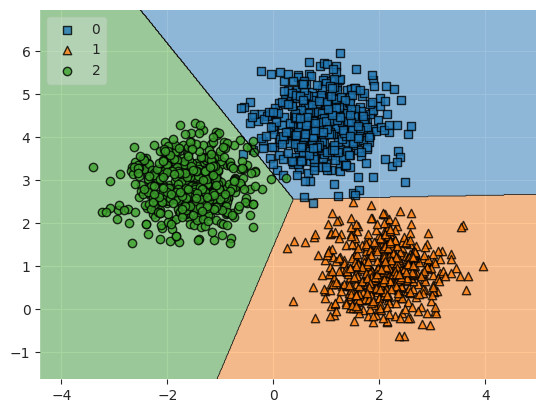

In [88]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from mlxtend.plotting import plot_decision_regions
svm = LinearSVC(random_state=42)# Your code here
ovr_classifier = OneVsRestClassifier(svm)
ovr_classifier = ovr_classifier.fit(X, y)
# Plot decision boundary
plot_decision_regions(X, y, clf=ovr_classifier, legend=2)
plt.show()

### Using 5-fold cross validation compare the accuracies of each method

In [89]:
# Your code here